## Q5 HSV变换

### RGB 

[参考](https://blog.csdn.net/hanshanbuleng/article/details/80383813)

RGB是从颜色发光的原理来设计定的，通俗点说它的颜色混合方式就好像有红、绿、蓝三盏灯，当它们的光相互叠合的时候，色彩相混，而亮度却等于两者亮度之总和，越混合亮度越高，即加法混合

------
红、绿、蓝三个颜色通道每种色各分为256阶亮度，在0时“灯”最弱——是关掉的，而在255时“灯”最亮。当三色灰度数值相同时，产生不同灰度值的灰色调，即三色灰度都为0时，是最暗的黑色调；三色灰度都为255时，是最亮的白色调。

-------
在电脑中，RGB的所谓“多少”就是指亮度，并使用整数来表示。通常情况下，RGB各有256级亮度，用数字表示为从0、1、2...直到255。注意虽然数字最高是255，但0也是数值之一，因此共256级




### HSV
将使用 HSV 表示色彩的图像的色相反转
HSV 即使用**色相（Hue）、饱和度（Saturation）、明度（Value）**来表示色彩的一种方式

* 色相：将颜色使用0到360度表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应：

|红|黄|绿|青色|蓝色|品红|红|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|60|120|180|240|300|360|
 
 * 饱和度: 表示颜色接近光谱色的程度。一种颜色，可以看成是某种光谱色与白色混合的结果。其中光谱色所占的比例愈大，颜色接近光谱色的程度就愈高，颜色的饱和度也就愈高。饱和度高，颜色则深而艳。光谱色的白光成分为0，饱和度达到最高。通常取值范围为0%～100%，值越大，颜色越饱和。
 
 * 明度: 表示颜色明亮的程度，对于光源色，明度值与发光体的光亮度有关；对于物体色，此值和物体的透射比或反射比有关。通常取值范围为0%（黑）到100%（白）

### 应用openCV中HSV取值范围说明

我们需要注意的在不同应用场景中，HSV取值范围是不尽相同的。

1.PS软件时，H取值范围是0-360，S取值范围是（0%-100%），V取值范围是（0%-100%）。

2.利用openCV中cvSplit函数的在选择图像IPL_DEPTH_32F类型时，**H取值范围是0-360，S取值范围是0-1（0%-100%），V取值范围是0-1（0%-100%）**

3.利用openCV中cvSplit函数的在选择图像IPL_DEPTH_8UC类型时，**H取值范围是0-180，S取值范围是0-255，V取值范围是0-255**

### RGB2HSV
$$R^{\prime}=R / 255$$
$$G^{\prime}=G / 255$$
$$B^{\prime}=B / 255$$
$$C \max =\max \left(R^{\prime}, G^{\prime}, B^{\prime}\right)$$
$$C \min =\min \left(R^{\prime}, G^{\prime}, B^{\prime}\right)$$
$$\Delta=C \max -C \min$$

**Hue**
$$H\left\{\begin{array}{ll}{0^{\circ}} & {\Delta=0} \\ {60^{\circ} \times\left(\frac{G^{\prime}-B^{\prime}}{\Delta}+0\right)} & {, C \max =R^{\prime}} \\ {60^{\circ} \times\left(\frac{B^{\prime}-R^{\prime}}{\Delta}+2\right)} & {, C \max =G^{\prime}} \\ {60^{\circ} \times\left(\frac{R^{\prime}-G^{\prime}}{\Delta}+4\right)} & {, C \max =B^{\prime}}\end{array}\right.$$

**Saturation**
$$S=\left\{\begin{array}{cl}{0} & {C \max =0} \\ {\frac{\Delta}{C \max }} & {C \max \neq 0}\end{array}\right.$$

**Value**
$$V=C \max$$



In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

B [[132 104 100 ... 175 134 163]
 [140 117 106 ... 177 176 152]
 [137 131 119 ... 207 232 161]
 ...
 [231 153 160 ... 107 101  93]
 [255 172 168 ... 150 119 112]
 [214 187 176 ... 185 151 116]] 
G [[ 80  55  54 ... 109  88 126]
 [ 88  65  54 ... 139 137 110]
 [ 85  77  67 ... 155 179 104]
 ...
 [172  97 107 ...  55  60  59]
 [198 114 116 ...  76  59  58]
 [154 130 124 ... 117  98  70]] 
R [[ 67  39  36 ... 110  70 100]
 [ 71  52  47 ... 135 123  91]
 [ 69  66  60 ... 148 159  82]
 ...
 [152  80  97 ...  38  38  36]
 [176  95 104 ...  58  35  33]
 [130 109 112 ...  94  71  39]] 
pixel [[[132  80  67]
  [104  55  39]
  [100  54  36]
  ...
  [175 109 110]
  [134  88  70]
  [163 126 100]]

 [[140  88  71]
  [117  65  52]
  [106  54  47]
  ...
  [177 139 135]
  [176 137 123]
  [152 110  91]]

 [[137  85  69]
  [131  77  66]
  [119  67  60]
  ...
  [207 155 148]
  [232 179 159]
  [161 104  82]]

 ...

 [[231 172 152]
  [153  97  80]
  [160 107  97]
  ...
  [107  55  38]
  [101  60  38]
  [ 9

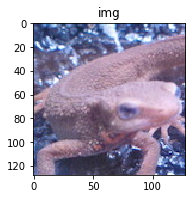

In [12]:
# read image
img = cv2.imread("gg.jpg")

#  get  B G R channels
B = img[ : , : , 0 ] 
G = img[ : , : , 1 ] 
R = img[ : , : , 2 ] 

# img_show = cv2.merge([R,G,B])
img_show = np.zeros_like(img)

img_show[ : , : , 0 ] = R
img_show[ : , : , 1 ] = G
img_show[ : , : , 2 ] = B

plt.figure()
plt.subplot(121)
plt.imshow(img_show)
plt.title("img")

print("B", B,
     "\nG", G,
     "\nR", R,
     "\npixel",img)

### 图像的排列
[参考](https://blog.csdn.net/weixin_41847115/article/details/83794551)

cv2 读出的图片是HWC格式
既是： 多个通道对应空间位置的像素紧挨在一起，即 **BRGBRGBRGBRGBRGBGR** 这种形式

In [13]:
# 归一化
img = img / 255 
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)  #  给出axis方向最小值的下标
print(min_arg)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
index = np.where(min_arg == 0)  # min == B
H[index] = 60 * (img[ : , : , 1][index] - img[ : , : , 2][index]) / (max_v[index] - min_v[index]) + 60
index = np.where(min_arg == 1)  # min == G
H[index] = 60 * (img[ : , : , 2][index] - img[ : , : , 0][index]) / (max_v[index] - min_v[index]) + 300
index = np.where(min_arg == 2)  # min == R
H[index] = 60 * (img[ : , : , 0][index] - img[ : , : , 1][index]) / (max_v[index] - min_v[index]) + 180

V = max_v.copy()

S = max_v.copy() - min_v.copy()

[[2 2 2 ... 1 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


### 从 HSV 色彩表示转换到 RGB 色彩表示通过以下方式计算：

```
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)

```

[[3.8        3.75384615 3.71875    ... 4.01515152 3.71875    3.58730159]
 [3.75362319 3.8        3.88135593 ... 3.9047619  3.73584906 3.68852459]
 [3.76470588 3.83076923 3.88135593 ... 3.88135593 3.7260274  3.72151899]
 ...
 [3.74683544 3.76712329 3.84126984 ... 3.75362319 3.65079365 3.59649123]
 [3.72151899 3.75324675 3.8125     ... 3.80434783 3.71428571 3.6835443 ]
 [3.71428571 3.73076923 3.8125     ... 3.74725275 3.6625     3.5974026 ]]
0
1
2
3
4
5


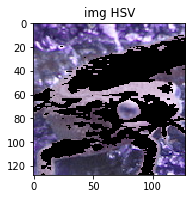

In [15]:
out_img = np.zeros_like(img)
H = (H + 180) % 360
C = S
H_ = H / 60
X = C * (1 - np.abs(H_ % 2 - 1))
Z = np.zeros_like(H)
vals = [[Z, X, C], [Z, C, X],[X, C, Z],[C, X, Z],[C, Z, X],[X, Z ,C]]

print(H_)

for i in range(6):
    print(i)
    index = np.where((i >= H_) & (H_ < (i+1)))
    out_img[:, :, 0][index] = (V - C)[index] + vals[i][0][index]
    out_img[:, :, 1][index] = (V - C)[index] + vals[i][1][index]
    out_img[:, :, 2][index] = (V - C)[index] + vals[i][2][index]

out_img[np.where(max_v == min_v)] = 0
out_img = (out_img * 255).astype(np.uint8)


plt.figure()
plt.subplot(122)
plt.imshow(out_img)
plt.title("img HSV")

# cv2.imshow("img HSV", out_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()